In [ ]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib
from community import community_louvain
import seaborn as sns
from termcolor import colored
from networkx.algorithms.community import label_propagation_communities
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [ ]:
#Đồ thị 1 phía
df = pd.read_csv('gelphi.csv', usecols=['source', 'target'])
df.dropna()
df.drop_duplicates()
df

,source,target
0,Bangladesh,Switzerland
1,Bangladesh,South Sudan
2,Bangladesh,Ethiopia
3,Bangladesh,Malta
4,Bangladesh,Argentina
...,...,...
12255,Mayotte,Bulgaria
12256,Mayotte,Burundi
12257,Bulgaria,Turks and Caicos Islands
12258,Bulgaria,Grenada


In [ ]:
G = nx.Graph()

edges = df[['source', 'target']]
G = nx.from_pandas_edgelist(edges, 'source', 'target')

print('Số đỉnh của đồ thị là', len(G.nodes()))
print('Số cạnh của đồ thị là', len(G.edges()))

Số đỉnh của đồ thị là 185
Số cạnh của đồ thị là 12260


**Betweenness centrality**

In [ ]:
#tính toán độ trung tâm betweenness cho từng nút trong đồ thị G
def print_table(data, columns):
  df = pd.DataFrame(data, columns=columns)
  return df
bet_cen = nx.betweenness_centrality(G, normalized=False) #returns a dictionary
sorted_bet_cen = sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)

bet_cen_df = print_table(bet_cen.items(), ['Node', 'Betweenness centrality'])

bet_cen_df

,Node,Betweenness centrality
0,United States,151.005506
1,Cyprus,31.095465
2,French Polynesia,61.812396
3,Jordan,48.411599
4,Swaziland,0.000000
...,...,...
180,New Zealand,33.170215
181,Oman,53.001829
182,Gibraltar,0.000000
183,Libya,11.267754


Biểu đồ thể hiện giá trị betweenness centrality của các node trong graph


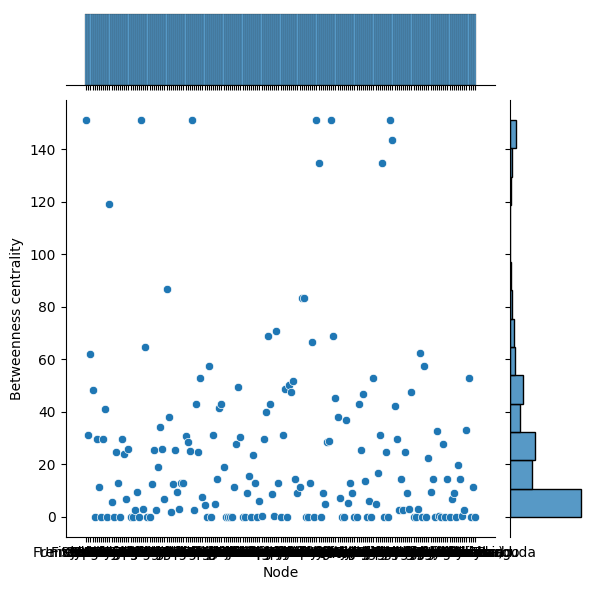

In [ ]:
#Biểu đồ thể hiện giá trị betweenness centrality
print(colored("Biểu đồ thể hiện giá trị betweenness centrality của các node trong graph", 'green', attrs=['bold']))
sns.jointplot(x="Node", y="Betweenness centrality", data=bet_cen_df)

Biểu đồ thể hiện phân bố betweenness centrality của các node trong graph


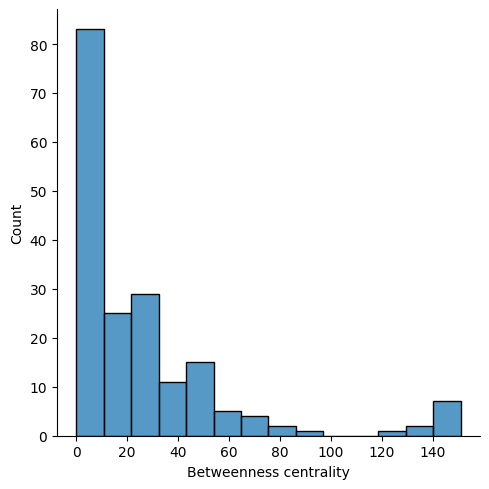

In [ ]:
#Biểu đồ thể hiện phân bố betweenness centrality của các node trong graph
print(colored("Biểu đồ thể hiện phân bố betweenness centrality của các node trong graph", 'green', attrs=['bold']))
sns.displot(x="Betweenness centrality", data=bet_cen_df)

In [ ]:
#Top10 quốc gia có Betweenness centrality lớn nhất
top_ten_max_bet_cen = sorted_bet_cen[:10]
print('Top 10 quốc gia có Betweenness centrality lớn nhất: ')
print_table(top_ten_max_bet_cen, ['DestinationCountry', 'Betweenness centrality'])

Top 10 quốc gia có Betweenness centrality lớn nhất: 


,DestinationCountry,Betweenness centrality
0,United States,151.005506
1,United Arab Emirates,151.005506
2,United Kingdom,151.005506
3,Germany,151.005506
4,Hong Kong,151.005506
5,Singapore,151.005506
6,Australia,143.407282
7,China,134.620986
8,Japan,134.620986
9,Canada,118.983457


In [ ]:
#Top 10 quốc gia có Betweenness centrality nhỏ nhất
top_ten_min_bet_cen = sorted_bet_cen[-10:]
print('Top 10 quốc gia có Betweenness centrality nhỏ nhất: ')
print_table(top_ten_min_bet_cen, ['DestinationCountry', 'Betweenness centrality'])

Top 10 quốc gia có Betweenness centrality nhỏ nhất: 


,DestinationCountry,Betweenness centrality
0,Cook Islands,0.0
1,Turkmenistan,0.0
2,Brunei,0.0
3,Guinea,0.0
4,Kyrgyzstan,0.0
5,Reunion,0.0
6,Trinidad and Tobago,0.0
7,East Timor,0.0
8,Gibraltar,0.0
9,Aruba,0.0


**CLUSTER ALGORITHM**

**1. Girvan-Newman**

In [ ]:
#Định nghĩa 'edge_to_remove' và xác định cạnh có độ trung tâm betweenness centrality cao nhất trong đồ thị
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [ ]:
#riển khai thuật toán Girvan-Newman để phân tách đồ thị thành các cụm con
def girvan_newman(graph):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while(sg_count == 1):
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)
    return sg

In [ ]:
# tìm các cụm trong đồ thị G
c = girvan_newman(G.copy())

node_groups = []

for i in c:
  node_groups.append(list(i))

In [ ]:
print(node_groups)

[['Pakistan', "Cote d'Ivoire", 'Sierra Leone', 'Antigua and Barbuda', 'Togo', 'Libya', 'Djibouti', 'Mauritius', 'Lesotho', 'Palau', 'Burma', 'Oman', 'China', 'France', 'Montenegro', 'Malawi', 'United Arab Emirates', 'Philippines', 'Seychelles', 'Lithuania', 'United Kingdom', 'Luxembourg', 'Dominican Republic', 'Indonesia', 'Brunei', 'Norway', 'Colombia', 'Portugal', 'Bangladesh', 'Argentina', 'Chile', 'Netherlands', 'Algeria', 'Kazakhstan', 'Kenya', 'Sweden', 'Samoa', 'Burkina Faso', 'South Korea', 'Turkmenistan', 'Switzerland', 'Zimbabwe', 'Hong Kong', 'Italy', 'Afghanistan', 'Suriname', 'Swaziland', 'Guam', 'Congo (Brazzaville)', 'Turkey', 'East Timor', 'Panama', 'United States', 'Cook Islands', 'Equatorial Guinea', 'Namibia', 'Kuwait', 'Australia', 'Moldova', 'Haiti', 'Reunion', 'Vanuatu', 'Poland', 'Croatia', 'Chad', 'Cuba', 'French Polynesia', 'Martinique', 'Azerbaijan', 'Trinidad and Tobago', 'Senegal', 'Iran', 'Cyprus', 'Gibraltar', 'Belgium', 'Benin', 'Ghana', 'Sri Lanka', 'Tun

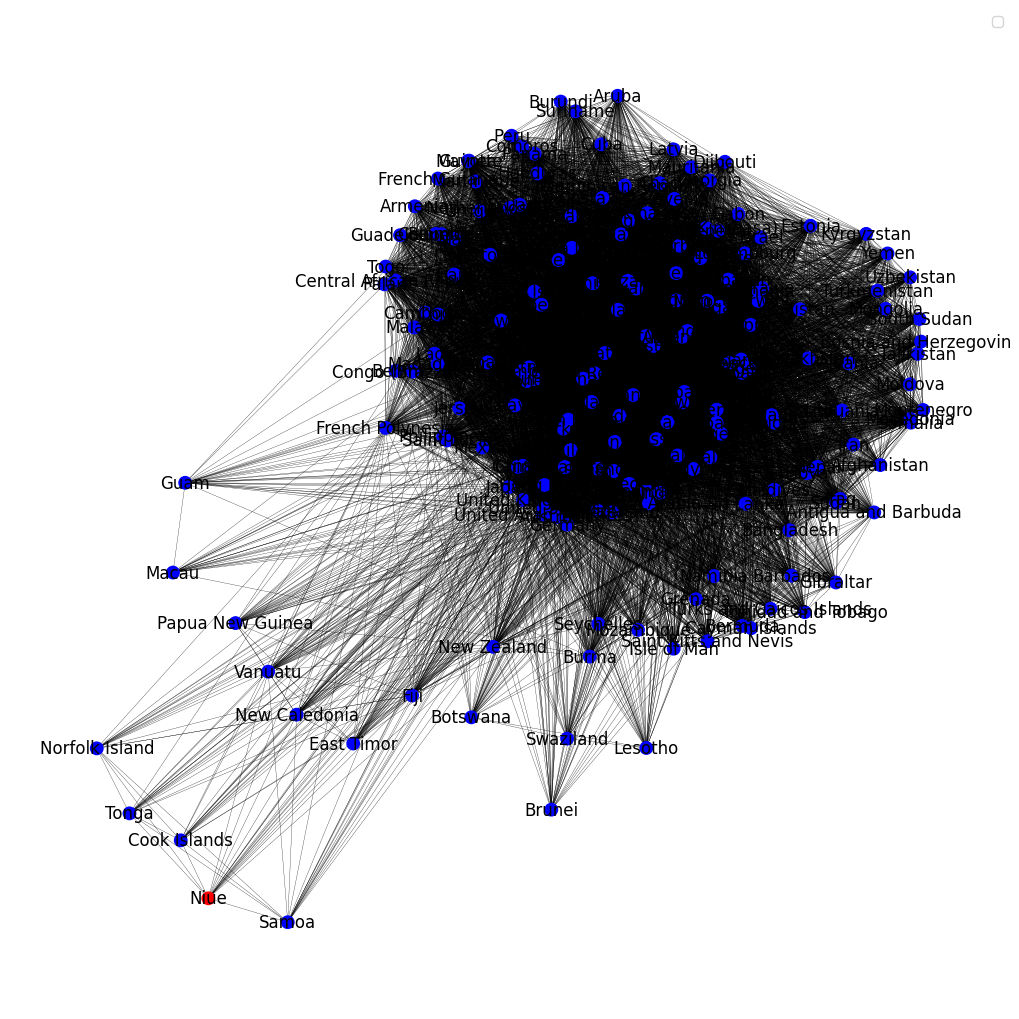

In [ ]:
#Vẽ đồ thị với các cụm (communities) đã được phân loại trước đó
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('red')

pd.option_context('precision',15)

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]

pos = nx.spring_layout(G)
fig = plt.figure(figsize = (10,10), dpi=100)



cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)


nx.draw(G, node_color=color_map, with_labels=True,node_size = 80,width = 0.2)
# nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = color_map, node_size = 20, with_labels= False,font_size = 6, width = 0.2, cmap = cmap, edge_color ='yellow')


plt.legend()
plt.show()